#### STDLIB

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
# do we need anything else?

#### Useful Functions/Constants for this homework

_I want to add that in the future we ought to:_
- use Astropy's `constants` package, or
- write our own `python` file with constants **and** fuctions

In [40]:
h = 4.136e-15 # Planck constant in eV s
kb = 8.617e-5 # Boltzmann constant in eV / K
eV_to_joules = 1.602e-19 # eV to joules conversion factor
c_ang = 3e18 # speed of light in Angstroms

def energy_in_eV(x, opt='lambda'):
    if opt == 'lambda':
        return h * c_ang / x
    elif opt == 'nu':
        return h * x

print 'Testing: h in joules:', h * eV_to_joules

lbl_ft_sz, title_ft_sz = 14, 20 # label and title font sizes

Testing: h in joules: 6.625872e-34


#### Problem 1

From the Lecture 6 notes, page 6, we can assume at low density $\left( n_e \ll 10^5 \ \textsf{cm}^{-3} \right)$ that collisional de-excitation is negligible so that the line intensity ratio $I[5755]/I[6548 + 6583]$ is (keeping in mind that $[\rm{N}II] \lambda 5755$ is a $^1 D \rightarrow ^1 S$ transition and $[\rm{N}II] \lambda 6548+6583$ are $^1 S \rightarrow ^3 P$ transitions)

$$\frac{I[5755]}{I[6548 + 6583]} = \frac{A_{^1 D, ^1 S}}{A_{^1 D, ^1 S} + A_{^3 P, ^1 D}} \frac{\Omega \left(^3 P, ^1 S \right)}{\Omega \left( ^3 P, ^1 D \right)} \frac{E \left(^3 P, ^1 D\right)}{E \left(^1 D, ^1 S\right)} \exp \left( \left( -E \left(^1 S \right) + E \left( ^1 D \right) \right) \ / \ kT \right),$$

(see pg. 210 in Draine or [here](http://www.astronomy.ohio-state.edu/~pogge/Ast871/Notes/Ionized.pdf), pg. 39, for the same equation above written slightly differently; this link comes from an OSU ISM course with superb notes.) For very high density regions in LTE, we can use eq. 18.8 from Draine:

$$\frac{I[5755]}{I[6548 + 6583]} = \frac{g_{^1 D, ^1 S} A_{^1 D, ^1 S} E\left(^1 D, ^1 S \right)}{g_{^3 P, ^1 D} A_{^3 P, ^1 D} E \left( ^3 P, ^1 D \right)} \exp \left( \left( - E \left(^1 S \right) + E \left( ^1 D \right) \right) \ / \ kT \right). $$

Alternative values of Einstein $A$ coeffiecients for forbidden lines can be found [here](https://books.google.com/books/about/The_Physics_and_Dynamics_of_Planetary_Ne.html?id=xxVkZBVIZeAC), pg. 35. I _think_ the curves below are accurate; see [here](http://pulsar.sternwarte.uni-erlangen.de/wilms/teach/ism/ismchap7.pdf) for the [OIII] line ratio as a function of temperature.

The critical density separates the low and high density regimes (see pg. 20 [here](http://www.astronomy.ohio-state.edu/~pogge/Ast871/Notes/Ionized.pdf)):

$$ n_{crit} = \frac{A_{ul}}{q_{ul}}, $$

where $A_{ul}$ is the Einstein A coefficient for the transition between upper and lower levels, and $q_{ul}$ is the de-excitation rate between upper and lower levels. 

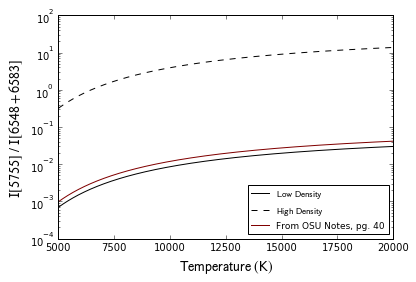

In [68]:
A_1d_1s, A_3p_1d = 1.1, 4e-3 # Einstein A coefficients
omega_3p_1s, omega_3p_1d = 0.36, 2.99 # effective collision strengths

# for the ratio of energies, we can find a weighted ratio of wavelengths - eq. from first link above, values from second link
A_1d_3p2, A_1d_3p1 = 3e-3, 1e-3
weight_wavelength = (A_1d_3p2 * 6583 + A_1d_3p1 * 6548) / (A_1d_3p2 + A_1d_3p1)
e_ratio = 5755 / weight_ratio # invert as E \propto 1 / \lambda

temps = np.linspace(5000, 20000, 501) # temperatures in K

n2_line_ratio_small_density = (A_1d_1s / (A_1d_1s + A_3p_1d)) \
    * (omega_3p_1s / omega_3p_1d) * e_ratio * np.exp((- energy_in_eV(3063) + energy_in_eV(weight_wavelength)) / (kb * temps))

g_1d_1s, g_3p_1d = 2 * 0 + 1, 2 * 2 + 1 # degeneracies
n2_line_ratio_high_denisty = (g_1d_1s / g_3p_1d) * (A_1d_1s / A_3p_1d) * e_ratio \
    * np.exp((- energy_in_eV(3063) + energy_in_eV(weight_wavelength)) / (kb * temps))
    
# adjust LaTeX font in plots to sans-serif
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)
    
# plots
#plt.semilogy(temps, .14 * np.exp(-25e3 / temps))
plt.semilogy(temps, n2_line_ratio_small_density, color='k', label=r'$\rm{Low \ Density}$')
plt.semilogy(temps, n2_line_ratio_high_denisty, color='k', linestyle='--', label=r'$\rm{High \ Density}$')
plt.semilogy(temps, 1 / (6.91 * np.exp(25000 / temps)), color='maroon', label='From OSU Notes, pg. 40')
plt.ylabel(r'$\rm{I}[5755] \ / \ \rm{I}[6548 + 6583]$', size=lbl_ft_sz)
plt.xlabel(r'$\rm{Temperature \ (K)}$', size=lbl_ft_sz)
plt.xlim(5000, 20000)
plt.xticks(np.linspace(5000, 20000, 7))
plt.legend(loc='best', fontsize=9, numpoints=1)
plt.show()

#### Problem 2

Relevant formulae/tables are in the Lecture 8 notes. For a Gaussian profile, we can assume the lines are optically thick so that 

$$ \frac{W_{\lambda}}{\lambda} = \frac{\lambda}{c} \int_{-\infty}^{\infty} d\nu \ \left[ 1 - \exp \left( - \tau_0 \ \exp \left(x^2 \right) \right) \right] \\ = \frac{2 \lambda}{c} \Delta \nu_D \int_{-\infty}^{\infty} d\nu \ \left[ 1 - \exp \left( - \tau_0 \ \exp \left(x^2 \right) \right) \right] \\ = \frac{2 b}{c} F\left(\tau_0\right),$$

following the convention on pg. 5 of the notes. 

#### Problem 3

Relevant equations are on pg. 10 of the Lecture 8 notes.